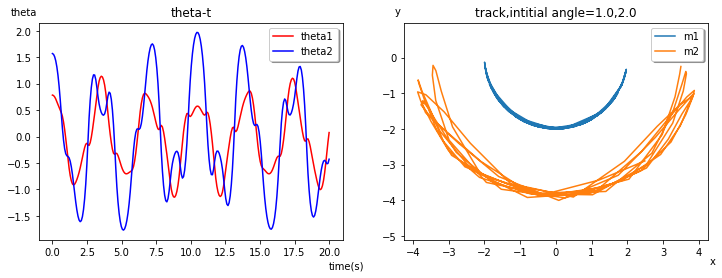

In [64]:
from sympy import Derivative as D
from math import sin,cos,pi
import numpy as np
from scipy.integrate import odeint,ode
import matplotlib.pyplot as plt

g=9.8
L=2
m=1


#x[th1,th2]
def dx(x,t):
    
    x1,x2,x3,x4=x[0],x[1],x[2],x[3]
    
    dx1=6/(m*L**2)*(2*x3-3*cos(x1-x2)*x4)/(16-9*cos(x1-x2)**2)
    dx2=6/(m*L**2)*(8*x4-3*cos(x1-x2)*x3)/(16-9*cos(x1-x2)**2)
    dx3=-0.5*m*L**2*(dx1*dx2*sin(x1-x2)+3*(g/L)*sin(x1))
    dx4=-0.5*m*L**2*(-dx1*dx2*sin(x1-x2)+(g/L)*sin(x2))    
    return[dx1,dx2,dx3,dx4]

x0=[pi/4,pi/2,0,0]    #初始狀態
t=np.linspace(0,20,250)  #設定時間 0~20s
x=odeint(dx,x0,t)     #解微分方程

#開繪製一波 角度-時間圖

fig,axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(t,x[:,0],'r',label="theta1")
axes[0].plot(t,x[:,1],'b',label="theta2")
axes[0].set_title("theta-t")
axes[0].legend(loc='upper right', shadow=True)
axes[0].text(-3,2.3, 'theta')
axes[0].text(20,-2.5, 'time(s)')

from math import sin,cos
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

g = 9.8

class DoublePendulum(object):
    def __init__(self, m1, m2, L1, L2):
        self.m1, self.m2, self.L1, self.L2 = m1, m2, L1, L2
        self.init_status = np.array([0.0,0.0,0.0,0.0])

#雙擺公式
    def equations(self, w, t):

        m1, m2, L1, L2 = self.m1, self.m2, self.L1, self.L2
        th1, th2, v1, v2 = w
        dth1 = v1
        dth2 = v2

        #eq of th1
        a = L1*L1*(m1+m2)  # dv1 parameter
        b = L1*m2*L2*cos(th1-th2) # dv2 paramter
        c = L1*(m2*L2*sin(th1-th2)*dth2*dth2 + (m1+m2)*g*sin(th1))

        #eq of th2
        d = m2*L2*L1*cos(th1-th2) # dv1 parameter
        e = m2*L2*L2 # dv2 parameter
        f = m2*L2*(-L1*sin(th1-th2)*dth1*dth1 + g*sin(th2))

        dv1, dv2 = np.linalg.solve([[a,b],[d,e]], [-c,-f])

        return np.array([dth1, dth2, dv1, dv2])

    #tstart = 開始時間  tend = 結束時間  tstep = 每幾秒一次
def double_pendulum_odeint(pendulum,tstart, tend, tstep):
   
    t = np.arange(tstart, tend, tstep)
    track = odeint(pendulum.equations, pendulum.init_status, t)
    th1_array, th2_array = track[:,0], track[:, 1]
    L1, L2 = pendulum.L1, pendulum.L2
    x1 = L1*np.sin(th1_array)
    y1 = -L1*np.cos(th1_array)
    x2 = x1 + L2*np.sin(th2_array)
    y2 = y1 - L2*np.cos(th2_array)
    pendulum.init_status = track[-1,:].copy() #將最後狀態帶入pendulum
    return [x1, y1, x2, y2]

if __name__ == "__main__":    
    
   
    pendulum = DoublePendulum(1.0, 1.0, 2.0,2.0) 
    th1, th2 = 1.0, 2.0
    pendulum.init_status[:2] = th1, th2
    x1, y1, x2, y2 = double_pendulum_odeint(pendulum,0,20,0.2)
    axes[1].plot(x1,y1, label = "m1")
    axes[1].plot(x2,y2, label = "m2")
    axes[1].set_title("track,intitial angle=%s,%s" % (th1, th2))
    axes[1].legend(loc='upper right', shadow=True) 
    axes[1].text(-4.5,1.2, 'y')
    axes[1].text(4.3,-5.8, 'x')
    plt.axis("equal")
